# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros;
- Aplique três métodos de clustering distintos nas duas bases acima.
- Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
from munkres import Munkres

# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **dim032.csv** que contém dados não descritos, onde foram feitos para a realização de clustering que se encontram no site:
http://cs.uef.fi/sipu/datasets/

## 1.1 Carregamento do arquivo

In [2]:
from clustering.labelMatch import rotulos, labelmatch
dataset = './dataset/dim032/dim032.csv'
clusters = './dataset/dim032/dim032-pa.csv'

In [3]:
data = pd.read_csv(
    dataset,
    header = None
    )

label = pd.read_csv(
    clusters,
    header = None
    )

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,84,152,100,52,95,186,169,106,37,186,...,190,65,214,116,75,55,123,65,154,177
1,86,149,101,56,93,181,171,116,37,192,...,191,79,215,116,76,60,130,71,151,181
2,83,149,99,51,96,187,169,108,34,191,...,190,65,213,118,73,55,125,63,155,178
3,86,142,101,64,105,183,172,116,49,180,...,186,69,209,120,68,56,123,67,144,181
4,89,145,108,54,91,180,175,107,35,192,...,188,67,212,118,91,50,135,58,147,165


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,95.626953,109.116211,112.750000,127.612305,139.097656,130.491211,142.145508,134.344727,97.023438,135.126953,...,120.544922,154.849609,123.900391,123.157227,105.608398,122.179688,130.062500,130.897461,106.218750,116.990234
std,33.615901,56.908917,51.135914,48.141948,59.470162,39.287918,45.671907,59.378414,42.142075,66.366363,...,67.089616,60.070835,58.308579,55.723743,48.049909,58.800397,61.676195,55.330114,47.630102,55.882102
min,30.000000,40.000000,40.000000,41.000000,28.000000,48.000000,48.000000,25.000000,24.000000,29.000000,...,29.000000,39.000000,28.000000,25.000000,24.000000,28.000000,40.000000,51.000000,41.000000,34.000000
25%,73.000000,56.000000,72.000000,81.750000,88.000000,104.000000,106.000000,79.000000,63.000000,58.500000,...,53.000000,118.750000,69.000000,87.500000,61.000000,56.000000,64.000000,88.000000,67.000000,74.000000
50%,88.500000,97.000000,97.000000,142.000000,169.000000,129.000000,159.000000,145.000000,85.000000,169.500000,...,111.500000,176.000000,117.500000,116.000000,113.000000,138.000000,143.000000,118.500000,102.000000,97.000000
75%,121.000000,145.000000,168.000000,162.000000,186.000000,150.000000,171.000000,188.750000,134.750000,187.000000,...,192.000000,207.000000,181.000000,179.750000,143.250000,169.750000,189.000000,182.250000,136.750000,162.750000
max,162.000000,219.000000,217.000000,217.000000,218.000000,225.000000,220.000000,229.000000,174.000000,222.000000,...,223.000000,235.000000,222.000000,218.000000,208.000000,219.000000,226.000000,227.000000,218.000000,223.000000


# 2. Pré-processamento

#### Validações efetivadas:
- 1. Dados faltantes representados por "NaN"
- 2. Dados que não possuem valores númericos

In [6]:
# data.isna().sum()

In [7]:
# for col in data:
    # print(col, data[col].unique())

#### 2.1 Conclusão:
- Os dados não possuem a necessidade de pré-processamento visto que já estão todos com valores validos

###  2.3 Análise estatística

In [8]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000,0.268198,-0.051122,-0.068849,0.599398,-0.438830,0.041834,0.122806,0.140755,0.017996,...,0.298212,0.022004,0.193500,-0.007820,-0.391960,0.478101,-0.658871,0.275498,-0.166015,0.234555
1,0.268198,1.000000,-0.434193,0.065247,0.147223,-0.087154,0.052960,0.112432,0.227755,0.442574,...,0.218035,-0.323157,0.388152,-0.007483,-0.222688,0.224718,0.126030,0.268201,-0.014487,0.132197
2,-0.051122,-0.434193,1.000000,-0.212930,0.077845,0.065985,-0.022429,-0.216804,-0.180707,-0.143382,...,0.142550,-0.167976,-0.479971,-0.183073,0.094760,-0.298575,0.080989,-0.458842,0.172647,-0.408891
3,-0.068849,0.065247,-0.212930,1.000000,-0.049977,-0.004621,0.348210,0.042810,0.093820,0.186358,...,0.056818,0.125137,0.050242,-0.082015,-0.042200,-0.079141,0.141606,0.276326,0.313186,-0.219960
4,0.599398,0.147223,0.077845,-0.049977,1.000000,-0.512794,-0.189263,0.334837,0.483320,0.257335,...,0.427911,-0.102514,0.071684,0.042287,-0.246345,0.260857,-0.326250,0.085673,0.004851,0.082626
5,-0.438830,-0.087154,0.065985,-0.004621,-0.512794,1.000000,0.549921,-0.635187,-0.236149,-0.517697,...,0.125967,-0.170035,0.165715,-0.463263,-0.138948,0.029176,0.013689,-0.169076,0.132724,0.028978
6,0.041834,0.052960,-0.022429,0.348210,-0.189263,0.549921,1.000000,-0.410581,-0.194464,-0.334774,...,0.240729,-0.315245,0.261003,-0.589061,-0.626816,0.142038,-0.162874,0.393038,0.493069,0.155258
7,0.122806,0.112432,-0.216804,0.042810,0.334837,-0.635187,-0.410581,1.000000,0.546772,0.702223,...,-0.178068,0.247391,0.277945,0.474793,0.290873,-0.147543,-0.145856,0.229722,0.120050,-0.121036
8,0.140755,0.227755,-0.180707,0.093820,0.483320,-0.236149,-0.194464,0.546772,1.000000,0.271853,...,-0.024533,0.151648,0.257148,0.219656,0.184472,0.315283,-0.126491,0.228800,-0.127096,-0.001655
9,0.017996,0.442574,-0.143382,0.186358,0.257335,-0.517697,-0.334774,0.702223,0.271853,1.000000,...,0.087693,-0.236956,0.198970,0.278513,0.186412,-0.334449,0.165812,-0.066543,0.323513,-0.220399


### 2.4 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [9]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data)

In [10]:
# data_scaler

In [11]:
data_scaled = pd.DataFrame(data_scaler)
data_scaled.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.346046,0.753920,-0.249457,-1.571379,-0.741871,1.413562,0.588274,-0.477591,-1.425007,0.766923,...,1.035764,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389
1,-0.286521,0.701178,-0.229892,-1.488251,-0.775518,1.286234,0.632086,-0.309097,-1.425007,0.857375,...,1.050677,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003
2,-0.375808,0.701178,-0.269023,-1.592161,-0.725048,1.439028,0.588274,-0.443892,-1.496230,0.842299,...,1.035764,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292
3,-0.286521,0.578114,-0.229892,-1.321994,-0.573638,1.337165,0.653992,-0.309097,-1.140117,0.676472,...,0.976113,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003
4,-0.197234,0.630856,-0.092935,-1.529815,-0.809165,1.260769,0.719710,-0.460741,-1.472489,0.857375,...,1.005939,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546


### 2.5 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há alguns outliers.

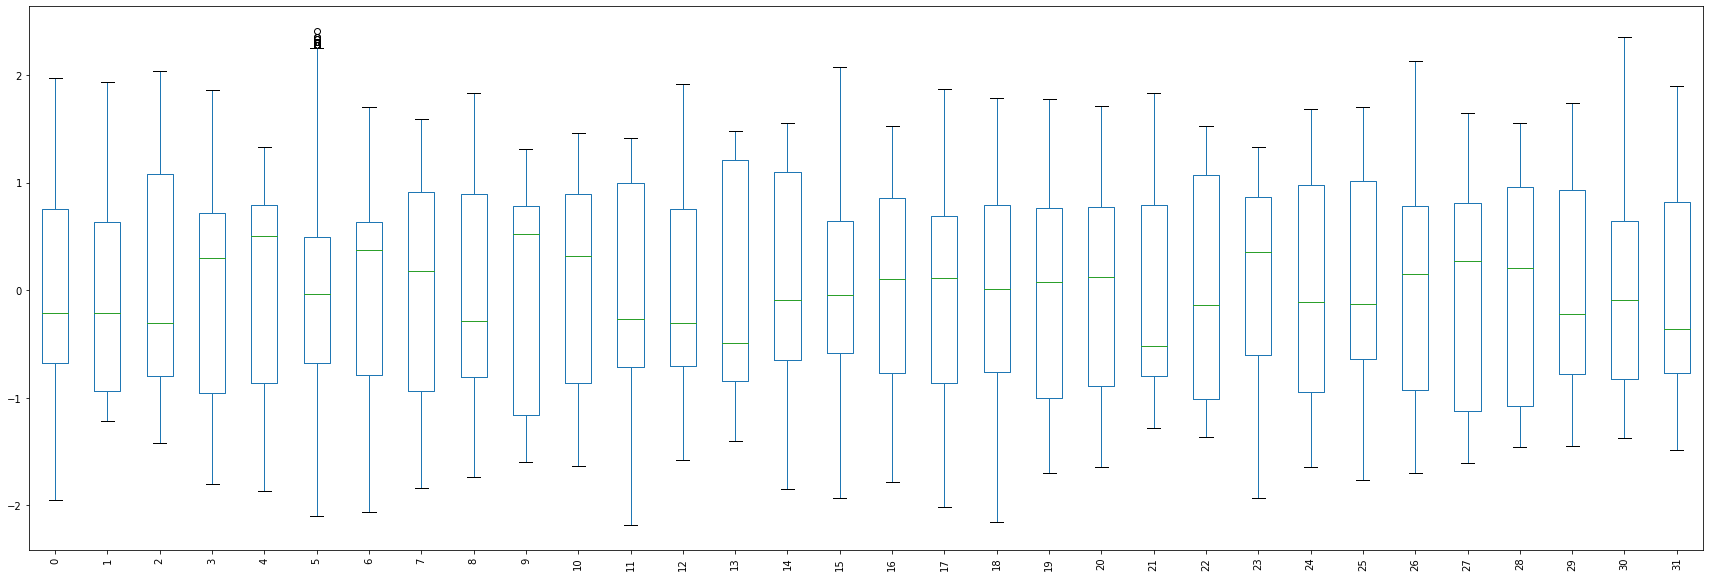

In [12]:
data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

# 3. Clustering

## 3.1 Dataset Completo

### 3.1.1 K-Means

In [13]:
data_kmeans = data_scaled.copy()

In [14]:
kmeans = KMeans(n_clusters = 16, init = 'random')
kmeans.fit(data_kmeans)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

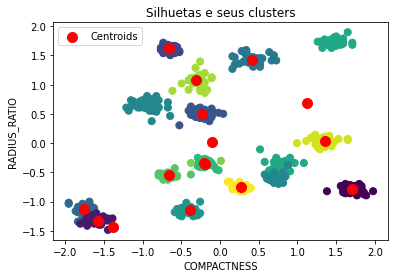

In [15]:
plt.scatter(data_scaler[:,0], data_scaler[:,31], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 31], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()


### 3.1.2 Agglomerative Clustering

In [16]:
data_agglo = data_scaled.copy()

In [17]:
agglo = AgglomerativeClustering(n_clusters=16, linkage='ward')
agglo.fit(data_agglo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=16)

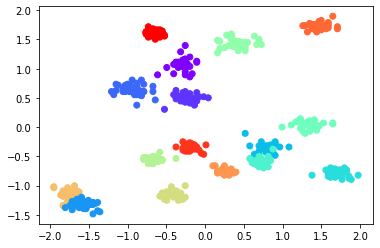

In [18]:
plt.scatter(data_scaler[:,0],data_scaler[:,31], c=agglo.labels_, cmap='rainbow')

### 3.1.3 Spectral Clustering

In [19]:
data_spectral = data_scaled.copy()

In [20]:
spectral = SpectralClustering(n_clusters=16)
spectral.fit(data_spectral)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=16, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

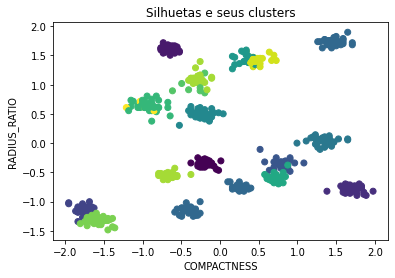

In [21]:
plt.scatter(data_scaler[:,0], data_scaler[:,31], c = spectral.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()

## 3.2 Dataset com atributos selecionados

In [22]:
data_reduzida = pd.DataFrame(SelectKBest(chi2, k=30).fit_transform(data, label))
data_reduzida.shape

data_scaler2 = scaler.fit_transform(X = data_reduzida)

In [23]:
# data_scaler2

In [24]:
data_scaled2 = pd.DataFrame(data_scaler2)
data_scaled2.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.753920,-0.249457,-1.571379,-0.741871,0.588274,-0.477591,-1.425007,0.766923,0.183892,1.284387,...,1.035764,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389
1,0.701178,-0.229892,-1.488251,-0.775518,0.632086,-0.309097,-1.425007,0.857375,0.199688,1.135397,...,1.050677,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003
2,0.701178,-0.269023,-1.592161,-0.725048,0.588274,-0.443892,-1.496230,0.842299,0.215484,1.199250,...,1.035764,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292
3,0.578114,-0.229892,-1.321994,-0.573638,0.653992,-0.309097,-1.140117,0.676472,0.294465,1.156682,...,0.976113,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003
4,0.630856,-0.092935,-1.529815,-0.809165,0.719710,-0.460741,-1.472489,0.857375,0.215484,1.390807,...,1.005939,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546


### 3.2.1 K-Means

In [25]:
data_kmeans2 = data_scaled2.copy()

In [26]:
kmeans2 = KMeans(n_clusters = 16, init = 'random')
kmeans2.fit(data_kmeans2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

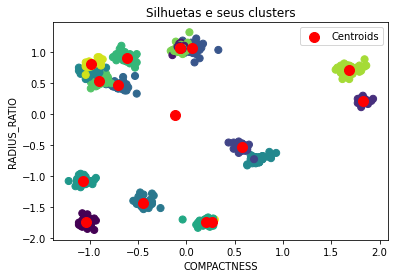

In [27]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], s = 50, c = kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 3], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.2.2 Agglomerative Clustering

In [28]:
data_agglo2 = data_scaled2.copy()

In [29]:
agglo2 = AgglomerativeClustering(n_clusters=16, linkage='ward')
agglo2.fit(data_agglo2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=16)

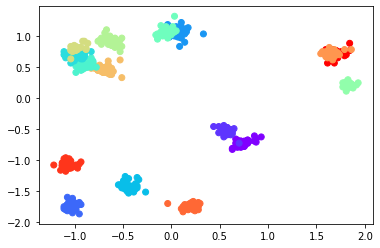

In [30]:
plt.scatter(data_scaler2[:,0],data_scaler2[:,3], c=agglo2.labels_, cmap='rainbow')

### 3.2.3

In [31]:
data_spectral2 = data_scaled2.copy()

In [32]:
spectral2 = SpectralClustering(n_clusters=16)
spectral2.fit(data_spectral2)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=16, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

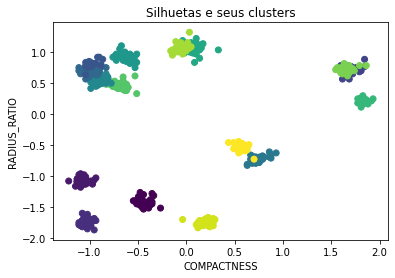

In [33]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], c = spectral2.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()


# 4. Avaliação

In [34]:
lista = np.array(label[0].tolist())
for idx, value in np.ndenumerate(lista):
    lista[idx] = value - 1

### 4.1.1 KMeans - Completo

In [35]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans.cluster_centers_, 16, dataset, newData)

In [36]:
# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)

In [37]:
# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('KMeans Completo')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_kmeans_completo = np.array(["KmeansCompleto", hbt, arit, amit, f1t, accurracyt, silhouettet])

KMeans Completo

Confusion Matrix: 
 [[64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 58  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0 62]]

Calinski-Harabaz Score:  169.3622996399253

Adjusted-Rand Score:  0.36659079838476455

Adjusted Mutual Info Score:  0.8072254337494552

F1 Score:

### 4.1.2 KMeans - Selecionado

In [38]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

In [39]:
# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans2.cluster_centers_, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)

# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('KMeans Selecionado')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_kmeans_selecionado = np.array(["KmeansSelecionado", hbt, arit, amit, f1t, accurracyt, silhouettet])

KMeans Selecionado

Confusion Matrix: 
 [[ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]]

Calinski-Harabaz Score:  124.35362437854762

Adjusted-Rand Score:  0.2079738449131807

Adjusted Mutual Info Score:  0.6660348678012343

F1 Sco

### 4.2.1 Agglomerative Clustering - Completo

In [40]:
def centroide(data):
    array2 = []
    for valor in range(0,16):
        df_aux = data.loc[data.Label == valor]
        array = []
        for coluna in df_aux:
            array.append(df_aux[coluna].mean())

        array2.append(array)

    return np.array(array2)

In [41]:
data_agglo['Label'] = agglo.labels_

In [42]:
centroide_hieraquico = centroide(data_agglo)

In [43]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Agglomerative Clustering - Completo')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_aglome_completo = np.array(["AgglomerativeCompleto", hbt, arit, amit, f1t, accurracyt, silhouettet])

Agglomerative Clustering - Completo

Confusion Matrix: 
 [[63  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 63  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0 61  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]]

Calinski-Harabaz Score:  155.21737618569244

Adjusted-Rand Score:  0.3667464674928476

Adjusted Mutual Info Score:  0.8059812

### 4.2.2  Agglomerative Clustering - Selecionado

In [44]:
data_agglo2['Label'] = agglo2.labels_
data_agglo2.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Label
0,0.753920,-0.249457,-1.571379,-0.741871,0.588274,-0.477591,-1.425007,0.766923,0.183892,1.284387,...,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389,0
1,0.701178,-0.229892,-1.488251,-0.775518,0.632086,-0.309097,-1.425007,0.857375,0.199688,1.135397,...,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003,0
2,0.701178,-0.269023,-1.592161,-0.725048,0.588274,-0.443892,-1.496230,0.842299,0.215484,1.199250,...,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292,0
3,0.578114,-0.229892,-1.321994,-0.573638,0.653992,-0.309097,-1.140117,0.676472,0.294465,1.156682,...,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003,0
4,0.630856,-0.092935,-1.529815,-0.809165,0.719710,-0.460741,-1.472489,0.857375,0.215484,1.390807,...,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546,0


In [45]:
centroide_hieraquico2 = centroide(data_agglo2)

In [46]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico2, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Agglomerative Clustering - Selecionado')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_aglome_selecionado = np.array(["AgglometariveSelecionado", hbt, arit, amit, f1t, accurracyt, silhouettet])

Agglomerative Clustering - Selecionado

Confusion Matrix: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  1  6]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  176.872627934496

Adjusted-Rand Score:  0.4125980769947982

Adjusted Mutual Info Score:  0.801604

### 4.3.1 Spectral Clustering - Completo

In [47]:
data_spectral['Label'] = spectral.labels_
data_spectral.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,-0.346046,0.753920,-0.249457,-1.571379,-0.741871,1.413562,0.588274,-0.477591,-1.425007,0.766923,...,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389,13
1,-0.286521,0.701178,-0.229892,-1.488251,-0.775518,1.286234,0.632086,-0.309097,-1.425007,0.857375,...,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003,13
2,-0.375808,0.701178,-0.269023,-1.592161,-0.725048,1.439028,0.588274,-0.443892,-1.496230,0.842299,...,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292,13
3,-0.286521,0.578114,-0.229892,-1.321994,-0.573638,1.337165,0.653992,-0.309097,-1.140117,0.676472,...,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003,13
4,-0.197234,0.630856,-0.092935,-1.529815,-0.809165,1.260769,0.719710,-0.460741,-1.472489,0.857375,...,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546,11


In [48]:
centroide_spectral = centroide(data_spectral)

In [49]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Spectral Clustering - Completo')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_spectral_completo = np.array(["SpectralCompleto", hbt, arit, amit, f1t, accurracyt, silhouettet])

Spectral Clustering - Completo

Confusion Matrix: 
 [[45  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 63  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0 61  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]]

Calinski-Harabaz Score:  79.21052018422579

Adjusted-Rand Score:  0.15022297356601833

Adjusted Mutual Info Score:  0.602244233390

### 4.3.2  Spectral Clustering - Selecionado

In [50]:
data_spectral2['Label'] = spectral2.labels_
data_spectral2.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Label
0,0.753920,-0.249457,-1.571379,-0.741871,0.588274,-0.477591,-1.425007,0.766923,0.183892,1.284387,...,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389,6
1,0.701178,-0.229892,-1.488251,-0.775518,0.632086,-0.309097,-1.425007,0.857375,0.199688,1.135397,...,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003,6
2,0.701178,-0.269023,-1.592161,-0.725048,0.588274,-0.443892,-1.496230,0.842299,0.215484,1.199250,...,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292,6
3,0.578114,-0.229892,-1.321994,-0.573638,0.653992,-0.309097,-1.140117,0.676472,0.294465,1.156682,...,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003,6
4,0.630856,-0.092935,-1.529815,-0.809165,0.719710,-0.460741,-1.472489,0.857375,0.215484,1.390807,...,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546,6


In [51]:
centroide_spectral2 = centroide(data_spectral2)

In [52]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral2, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Spectral Clustering - Selecionado')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)

result_spectral_selecionado = np.array(["SpectralSelecionado", hbt, arit, amit, f1t, accurracyt, silhouettet])

Spectral Clustering - Selecionado

Confusion Matrix: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0  0  0  0  0  0 57  0  0  0  0  0  1  6]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  176.872627934496

Adjusted-Rand Score:  0.4125980769947982

Adjusted Mutual Info Score:  0.80160465152

In [53]:
result_columns = np.array(["Cluster", "Calinski Harabas", "Adjusted-Rand", "Adjusted Mutual Info", "F1", "Accuracy", "Silhouette"])
results = np.array([result_kmeans_completo, result_kmeans_selecionado, result_aglome_completo, result_aglome_selecionado, result_spectral_completo, result_spectral_selecionado])

pd.DataFrame(data=results, columns=result_columns)

,Cluster,Calinski Harabas,Adjusted-Rand,Adjusted Mutual Info,F1,Accuracy,Silhouette
0,KmeansCompleto,169.3622996399253,0.36659079838476455,0.8072254337494552,0.5879702537182852,0.62890625,0.49173250914729594
1,KmeansSelecionado,124.35362437854762,0.2079738449131807,0.6660348678012343,0.363476797103656,0.431640625,0.33323296706069877
2,AgglomerativeCompleto,155.21737618569244,0.3667464674928476,0.8059812774842965,0.5782167455668188,0.625,0.44679079182198017
3,AgglometariveSelecionado,176.872627934496,0.4125980769947982,0.8016046515297214,0.4721228867638497,0.5556640625,0.47151646969955086
4,SpectralCompleto,79.21052018422579,0.15022297356601833,0.6022442333905293,0.37572384847346635,0.419921875,0.20246184657635447
5,SpectralSelecionado,176.872627934496,0.4125980769947982,0.8016046515297214,0.4721228867638497,0.5556640625,0.47151646969955086
